In [49]:
#Importing Necessary Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv("C:/Users/me22b/Downloads/fdata.csv")

# Basic data overview
print(data.head())

# 2. Check for missing values (NaN) in each column
print("\nCheck for missing values (NaN) in each column:")
missing_values = data.isnull().sum()
print(missing_values)

# 3. Show percentage of missing values for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentage)

# 4. Check for any duplicate rows in the dataset
duplicates = data.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

# 5. Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(data.describe())

# 6. Check for data types of each column
print("\nData types of each column:")
print(data.dtypes)



numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# 8. Check for any inconsistent categorical values (if applicable)
categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(data[col].unique())

# Handling missing values by filling with the mean (for numerical columns)
data['Age'] = data['Age'].fillna(data['Age'].mean())

# Handling missing values by filling with the most frequent value (for categorical columns)
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

print("\nData cleaning complete!")


# Or drop rows with missing values (if necessary)
# data.dropna(inplace=True)




   Age  Gender  Weight (kg)  Height (m)  Session_Duration (hours)  \
0   21    Male         88.3        1.71                      1.69   
1   20  Female         74.9        1.53                      1.30   
2   20  Female         68.1        1.66                      1.11   
3   25    Male         53.2        1.70                      0.59   
4   22    Male         46.1        1.79                      0.64   

   Calories_Burned    BMI  Weight_2_Months_Ago (kg)  BMI_2_Months_Ago  
0             1313  30.20                      90.0              30.8  
1              883  32.00                      76.5              32.5  
2              677  24.71                      69.5              25.1  
3              532  18.41                      52.5              17.9  
4              556  14.39                      45.5              14.2  

Check for missing values (NaN) in each column:
Age                         0
Gender                      0
Weight (kg)                 0
Height (m)     

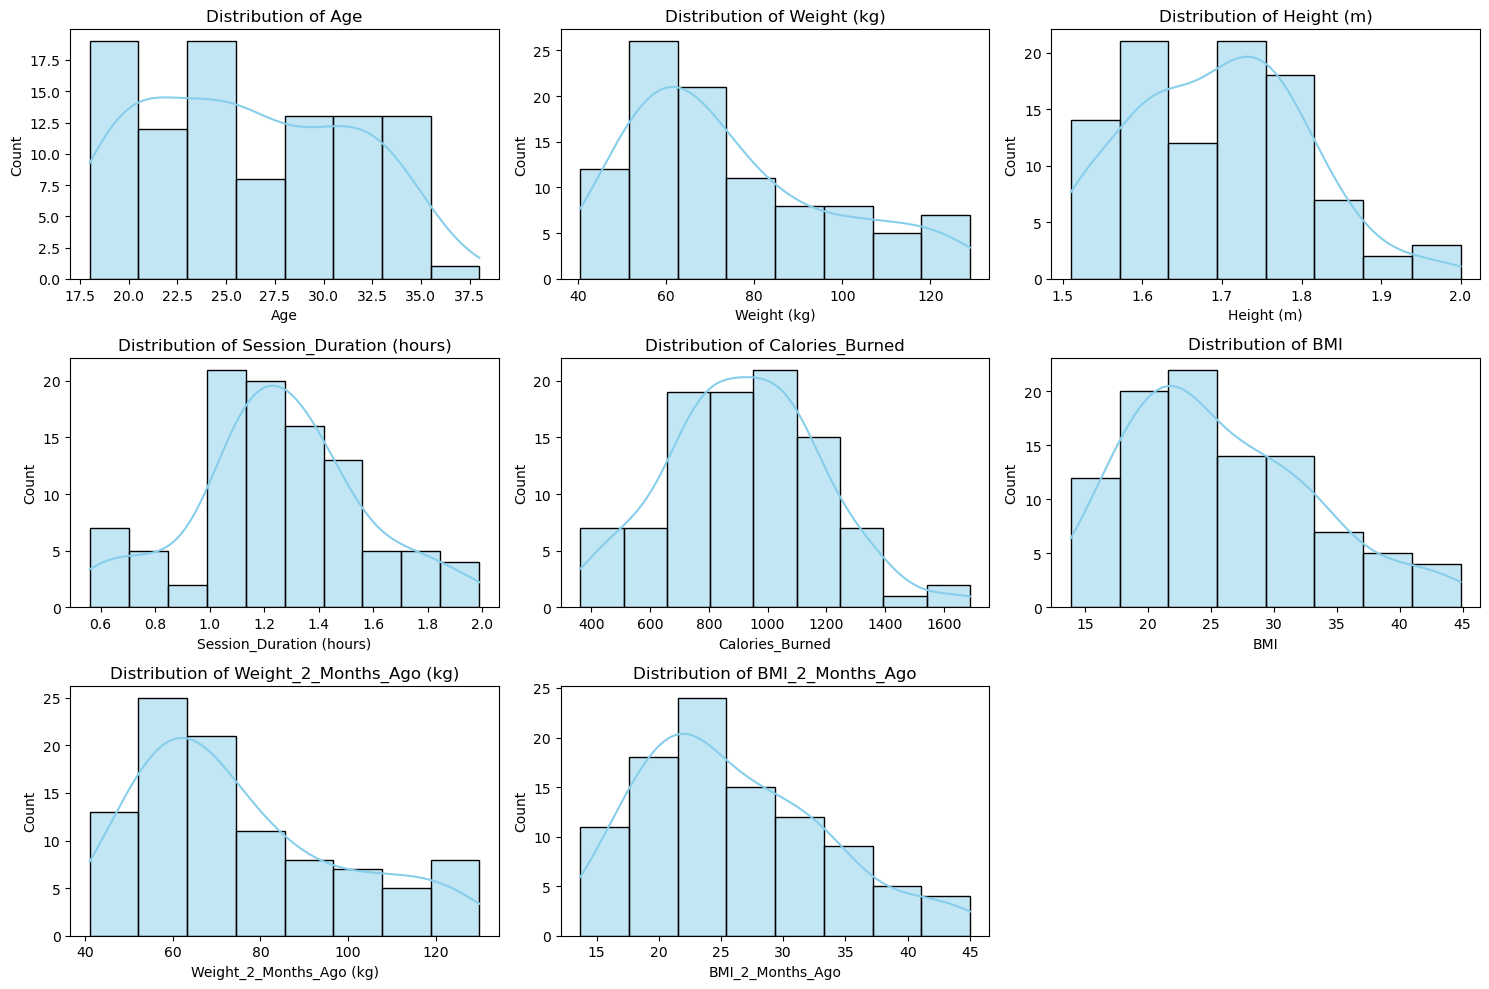

In [29]:
# Exploratory Data Analysis (EDA) - Histograms of Numerical Columns
numerical_cols = ['Age', 'Weight (kg)', 'Height (m)', 'Session_Duration (hours)', 
                  'Calories_Burned', 'BMI', 'Weight_2_Months_Ago (kg)', 'BMI_2_Months_Ago']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


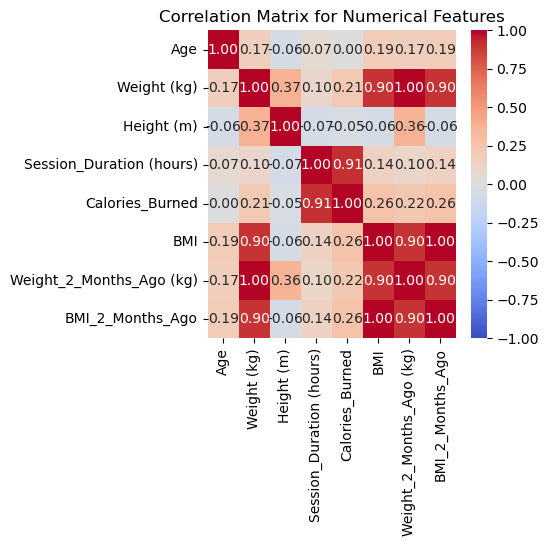

In [30]:
# Correlation Heatmap
correlation_matrix = data[numerical_cols].corr()
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix for Numerical Features")
plt.show()

In [31]:
# Define Features (X) and Target (y)
X = data.drop(columns=["Weight (kg)"])
y = data["Weight (kg)"]

# Identify categorical and numerical columns
categorical_cols = ["Gender"]
numerical_cols = ['Age', 'Height (m)', 'Session_Duration (hours)', 'Calories_Burned',
                  'BMI', 'Weight_2_Months_Ago (kg)', 'BMI_2_Months_Ago']

# Preprocessing: Standardize numerical features and encode categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

# Define pipeline with Linear Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = pipeline.predict(X_test)

# Calculate and print metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.10886247369094071
R-squared: 0.999795755553713


In [53]:
def predict_weight(pipeline, age, height, weight_2_months_ago, calories_burned, session_duration):
    # Create a DataFrame with the new data
    new_data = pd.DataFrame({
        'Age': [age],
        'Height (m)': [height],
        'Session_Duration (hours)': [session_duration],
        'Calories_Burned': [calories_burned],
        'Weight_2_Months_Ago (kg)': [weight_2_months_ago],
        # Fill in average values or previously calculated constants for other fields if necessary
        'Gender': ['Male'],  # Assuming 'Male' as default if using a model trained with OneHotEncoding
        'BMI': [(weight_2_months_ago) / (height ** 2)],
        'BMI_2_Months_Ago': [(weight_2_months_ago) / (height ** 2)]
    })

    # Predict the weight using the pipeline
    predicted_weight = pipeline.predict(new_data)
    
    # Calculate the BMI after 2 months with the predicted weight
    predicted_bmi = predicted_weight[0] / (height ** 2)

    # Recommendation logic based on predicted weight
    if predicted_bmi > 25:
        recommendation = "Consider adjusting your diet and workout routine to reduce weight. A balanced diet and increased physical activity could help."
    elif predicted_bmi < 18:
        recommendation = "It seems you should focus on good balanced diet to improve your health and weight"
    else:
        recommendation = " Great! You fall into healthy region. Consider continuing your workouts to keep your fitness."

    return predicted_weight[0], predicted_bmi, recommendation


# Input values for the new prediction
age = int(input("Enter Age: "))
height = float(input("Enter Height (in meters): "))
weight_2_months_ago = float(input("Enter Weight (in kg): "))
calories_burned = int(input("Enter Calories Burned: "))
session_duration = float(input("Enter Session Duration (in hours): "))

# Predict and display the weight along with BMI and recommendation
predicted_weight, predicted_bmi, recommendation = predict_weight(pipeline, age, height, weight_2_months_ago, calories_burned, session_duration)
print(f"Predicted Weight after 2 months: {predicted_weight:.2f} kg")
print(f"Predicted BMI after 2 months: {predicted_bmi:.2f}")
print(f"Recommendation: {recommendation}")


Enter Age:  20
Enter Height (in meters):  1.6
Enter Weight (in kg):  120
Enter Calories Burned:  700
Enter Session Duration (in hours):  2


Predicted Weight after 2 months: 119.72 kg
Predicted BMI after 2 months: 46.77
Recommendation: Consider adjusting your diet and workout routine to reduce weight. A balanced diet and increased physical activity could help.


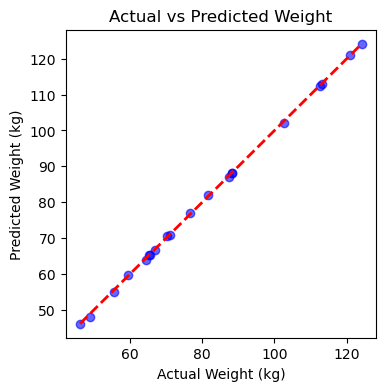

In [35]:
import matplotlib.pyplot as plt

# Generate predictions on the test set
y_pred = pipeline.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # 45-degree line
plt.xlabel('Actual Weight (kg)')
plt.ylabel('Predicted Weight (kg)')
plt.title('Actual vs Predicted Weight')
plt.show()
